# Introduction to data visualisation in R

In this workshop, we're going to work through how to make nice data visualisations in R.

We are going to do this using Google Colab to prevent spending an entire session getting everyone to install on their computers.

Much of the session is based of three excellent resources:

## Fundamentals of data visualisation

Understanding when to use different data visualisations is a major skill for presenting scientific findings and analyses. Prof. Claus Wilke has released an excellent and free online book called [**Fundamentals of Data Visualisation**](https://clauswilke.com/dataviz/). In this book, he describes the best way of visualising different data types and what to avoid. It is platform agnostic and applies whether you are making plots in R, Excel, Graph Pad or python. Use this as your default reference when thinking about how to visualise your data.

## Hadley Wickham's R for data science.
Hadley Wickham is the author of R packages `ggplot` and `tidyverse` which we will use extensively in this session. He has also produced a free online book that outlines many cool tricks you can do with these packages. We will explore a mere handful in this session, but they may prove useful in your project analyses. You can find his book [here](https://r4ds.hadley.nz/).


## Practical ggplot for data visualisation.
Combining these two things, Claus Wilke has [written a resource](https://github.com/clauswilke/practical_ggplot2) with practical examples of how to best use R to make your figures. Much of the code we will go through here is taken from this resource, so it's definitely worth checking out.



#Important Note:
**THERE IS NO REQUIREMENT TO DO YOUR COURSEWORK IN R**. What we are offering in this session is an opportunity to pick up some skills in data wrangling and visualisation. It's quite possible that all the things you'll see here can be done in Excel. It'll just be clunkier


# Let's get started!
Whenever you launch a new notebook, you'll need to make sure a few key libraries are available to you, so let's install the packages we'll need

In [37]:
library("repr")
library("tidyverse")
install.packages('cowplot')
library('cowplot')
library('colorspace')

# Sets the default size of the figures in the notebook
options(repr.plot.width=12.7, repr.plot.height=8.5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Base R

For those of you that are familiar with base R, this is how you would read in your data and look at the first 6 rows.

In [38]:
genome_data = read.csv(url('https://raw.githubusercontent.com/btemperton/BIO3097/main/full-genome-data.csv'))
head(genome_data)


,organism_name,taxonomy,size_mb,gc,num_genes,host,type
,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,Intestinibacter bartlettii,Bacteria;Terrabacteria group;Bacillota,3.00627,29.1000,2644,Homo sapiens,prokaryote
2,Burkholderia glumae,Bacteria;Pseudomonadota;Betaproteobacteria,7.32842,67.9114,6340,plants,prokaryote
3,Priestia megaterium,Bacteria;Terrabacteria group;Bacillota,5.17185,38.3000,5158,NA,prokaryote
4,Brucella melitensis,Bacteria;Pseudomonadota;Alphaproteobacteria,3.31189,57.2358,2971,none,prokaryote
5,Lacticaseibacillus rhamnosus,Bacteria;Terrabacteria group;Bacillota,2.99119,46.8000,2649,Homo sapiens,prokaryote
6,Pasteurella multocida,Bacteria;Pseudomonadota;Gammaproteobacteria,2.49599,40.3000,2355,rabbit,prokaryote


You might then plot the size of genome vs number of genes


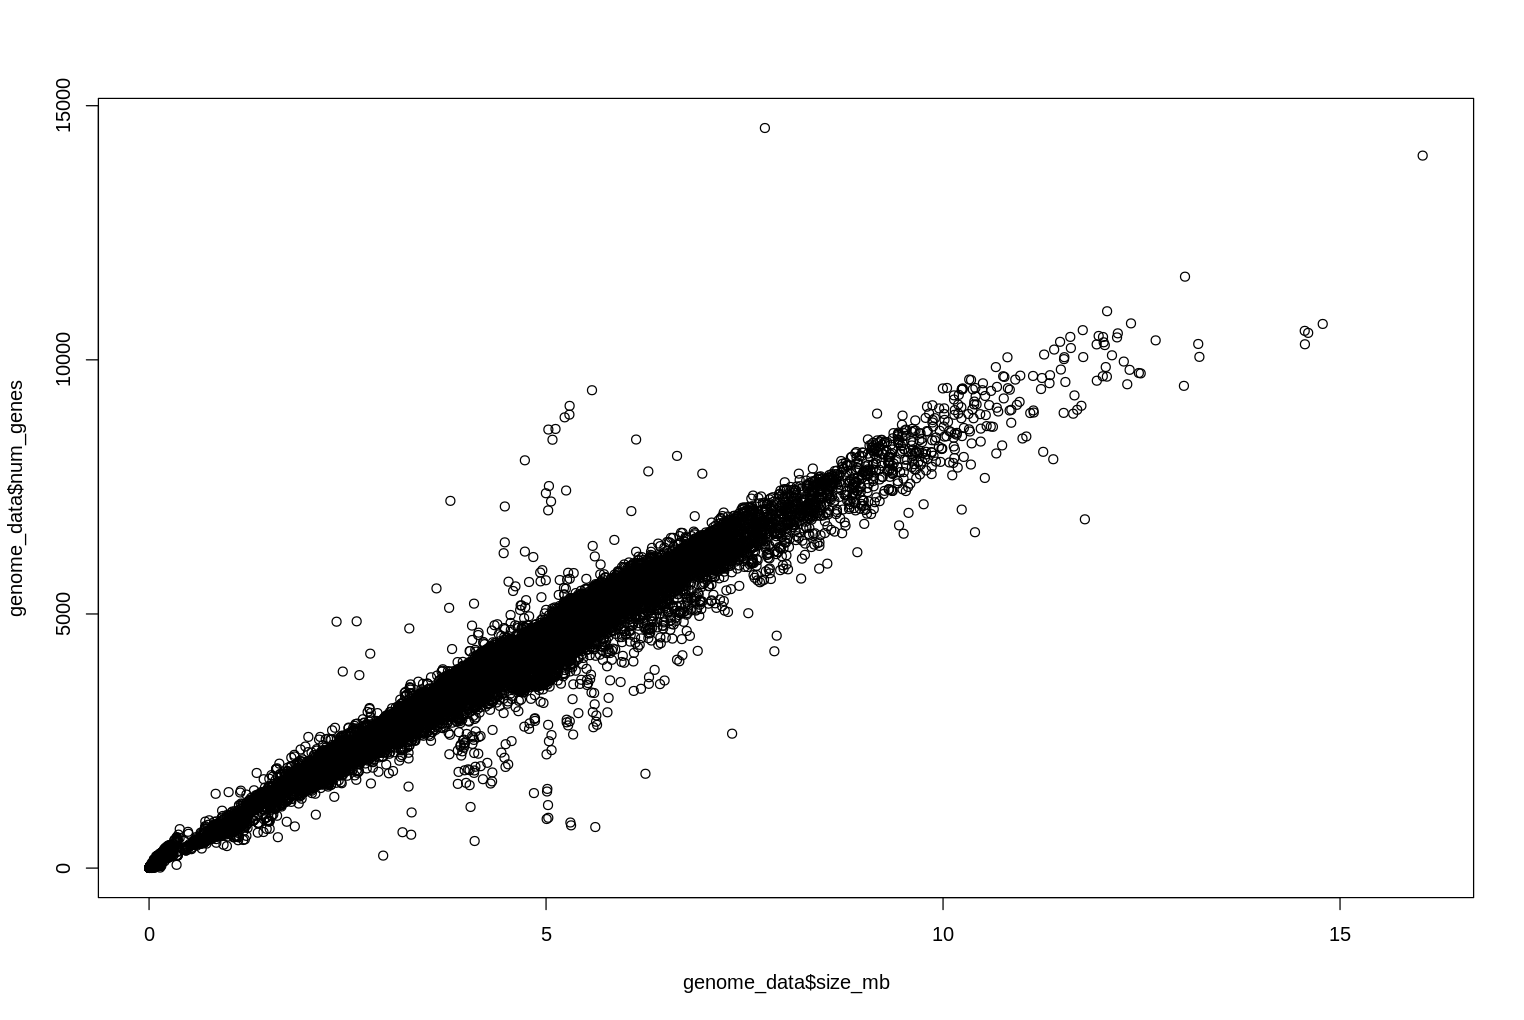

In [39]:
plot(genome_data$size_mb, genome_data$num_genes)


Looks like a pretty strong relationship. Cast your mind back to 2nd year stats and linear regression! We can test the model that the number of genes increases with the size of the genome in a linear fashion by testing

```
num_genes ~ size_mb
```

We want to test two things:

1. Estimate the coefficients that describe the numerical relationship between Predictors and Response (parameter estimation) and test whether they could in reality be zero (t-test)

2. Estimate whether the model explains more variation in the data than expected by chance (ANOVA)


Here the model we are testing is:

\begin{align}
number\ of\ genes = b_0 + b_1 \times genome\ size
\end{align}


And the observed data is:

\begin{align}
number\ of\ genes = b_0 + b_1 \times genome\ size + ERROR
\end{align}




We use the built-in `lm` function to create a `linear model`, and then we output the summary of that model using the `summary` function.


In [40]:
model = lm(num_genes ~ size_mb, data=genome_data)
summary(model)


Call:
lm(formula = num_genes ~ size_mb, data = genome_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4209.9   -53.6    -6.3   102.3  7659.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.5333     1.8438   33.37   <2e-16 ***
size_mb     881.9080     0.4673 1887.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236.8 on 47009 degrees of freedom
Multiple R-squared:  0.987,	Adjusted R-squared:  0.987 
F-statistic: 3.562e+06 on 1 and 47009 DF,  p-value: < 2.2e-16


The R squared value tells you that 98.7% of the variability in `num_genes` can be explained by variability in `size_mb`.

Let's look at the estimated coefficients of the line.

In [41]:
coef(model)


(Intercept)     size_mb 
   61.53328   881.90795

So on average, for every increase of 1Mb of genome, we increase the number of genes encoded by ~882.

# Improving the data visualisation

You can make some great graphics in base R, but it can take some work to get them pretty. The `tidyverse` library we imported at the start includes `ggplot` which we'll use to make some cool graphics.


`tidyverse` also comes with a better function for reading in data called `read_csv` (note the underscore, not the `.` used by the base method. This similarity is very annoying to debug!).

Much like base R `read.csv`, `tidyverse`'s `read_csv` takes a source (in this case a URL, but also allows you to quickly specify column types.


`col_type` specifies the type of data in each column as a single character. In this case it is:

1. character
2. character
3. double (i.e. a real number)
4. double
5. integer
6. character
7. factor

For more info on what you can do with `read_csv`, or indeed ANY `R` function, you can type `?read_csv` to get a description (e.g. prefix the name of the function with `?`).

In [42]:
genome_data = read_csv(url('https://raw.githubusercontent.com/btemperton/BIO3097/main/full-genome-data.csv'), show_col_types = FALSE, col_type='ccddicf')
head(genome_data)

organism_name,taxonomy,size_mb,gc,num_genes,host,type
<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<fct>
Intestinibacter bartlettii,Bacteria;Terrabacteria group;Bacillota,3.00627,29.1000,2644,Homo sapiens,prokaryote
Burkholderia glumae,Bacteria;Pseudomonadota;Betaproteobacteria,7.32842,67.9114,6340,plants,prokaryote
Priestia megaterium,Bacteria;Terrabacteria group;Bacillota,5.17185,38.3000,5158,NA,prokaryote
Brucella melitensis,Bacteria;Pseudomonadota;Alphaproteobacteria,3.31189,57.2358,2971,none,prokaryote
Lacticaseibacillus rhamnosus,Bacteria;Terrabacteria group;Bacillota,2.99119,46.8000,2649,Homo sapiens,prokaryote
Pasteurella multocida,Bacteria;Pseudomonadota;Gammaproteobacteria,2.49599,40.3000,2355,rabbit,prokaryote


## Introducing ggplot

`ggplot` is a package that is included in `tidyverse` for making nice data visualisations in R. It has a way of planning data visualisation that can seem backwards at first, especially if you're used to base `R`. In base `R` you think about the type of plot you want, then you give it the data to fit that plot. In `ggplot` you tell it what data you are wanting to use, and then you define the aesthetics and type of plot you want to apply to the data.

So, for a first test, let's just recreate the plot from above

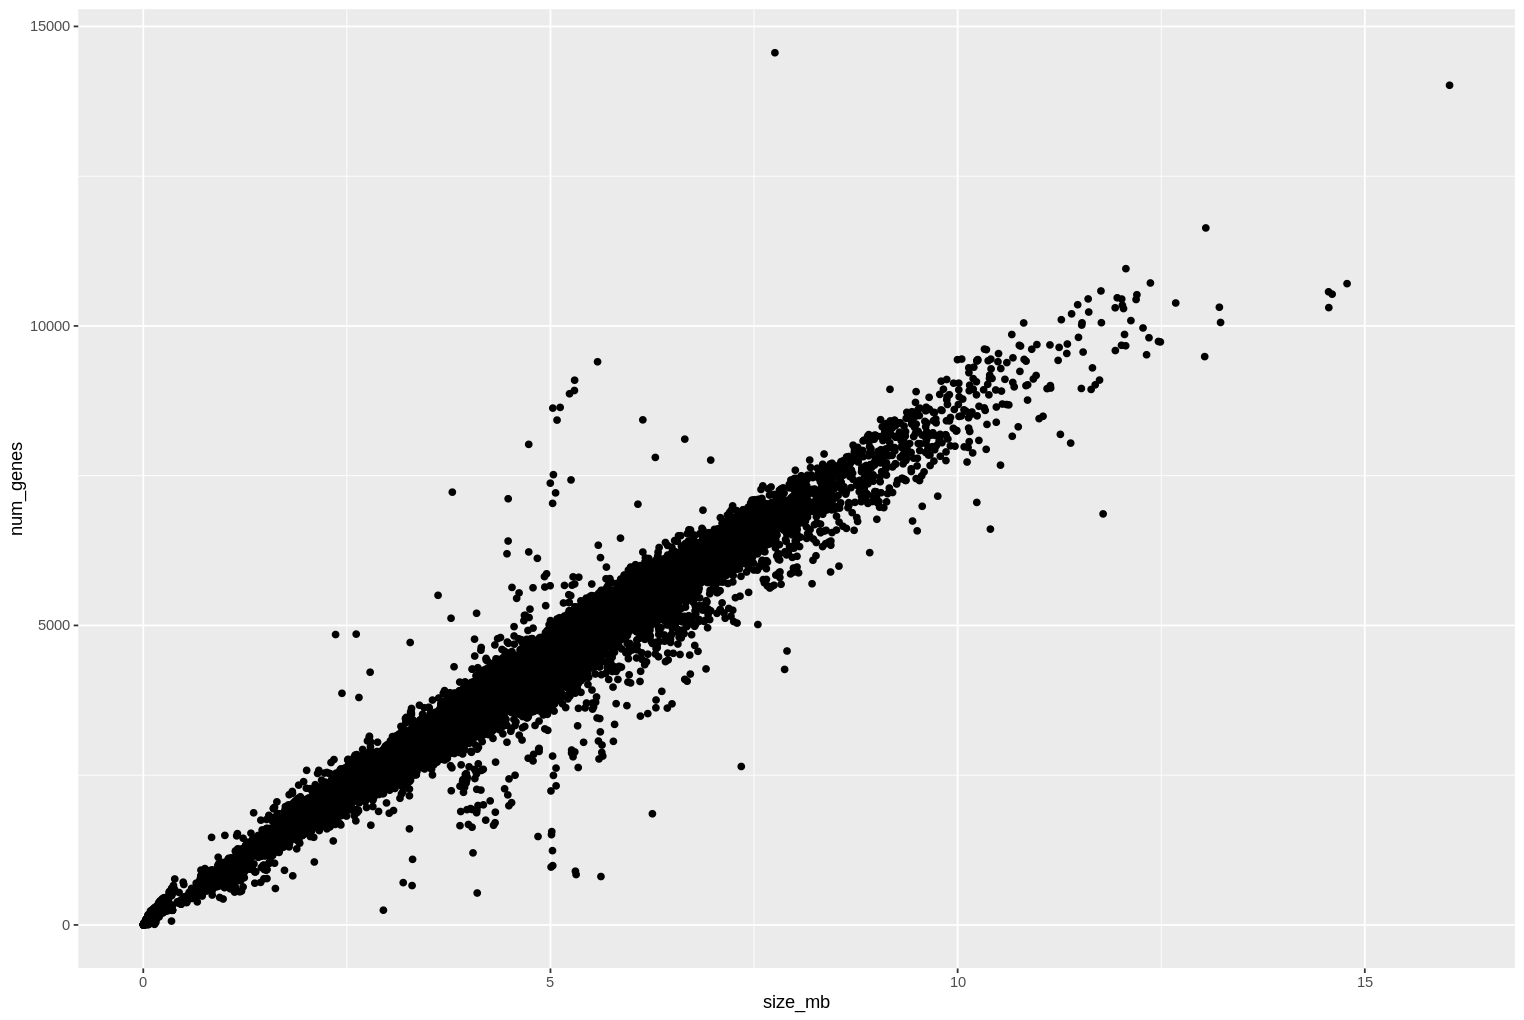

In [43]:
ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point()

We tell `ggplot` that we want to use the `genome_data` data and that we want the *aesthetic* (`aes`) to use the `size_mb` as the x-axis and `num_genes` as the y-axis. We then *add* to the base aesthetic how we want to plot the data. In this case, the style we want to apply is a scatter graph, which is `geom_point()`. By default, this uses solid black dots and a grey background with white lines for the ticks.

Currently, it's not a great deal better than the graph above, but the power of `ggplot` is how flexible it is to adapt your figure. Because R is open-source, there are many pre-written packages that extend `ggplot` to make it even better. The best one I've come across is `cowplot`, which we installed when we started the notebook at the top.

We can apply `cowplot` [themes](https://wilkelab.org/cowplot/articles/themes.html) to fix the **number one complaint** for almost all graphs - your axes numbers are too small. By default, it will also remove the grey box background for improved clarity. We apply our theme by *adding* it to the code we used previously:


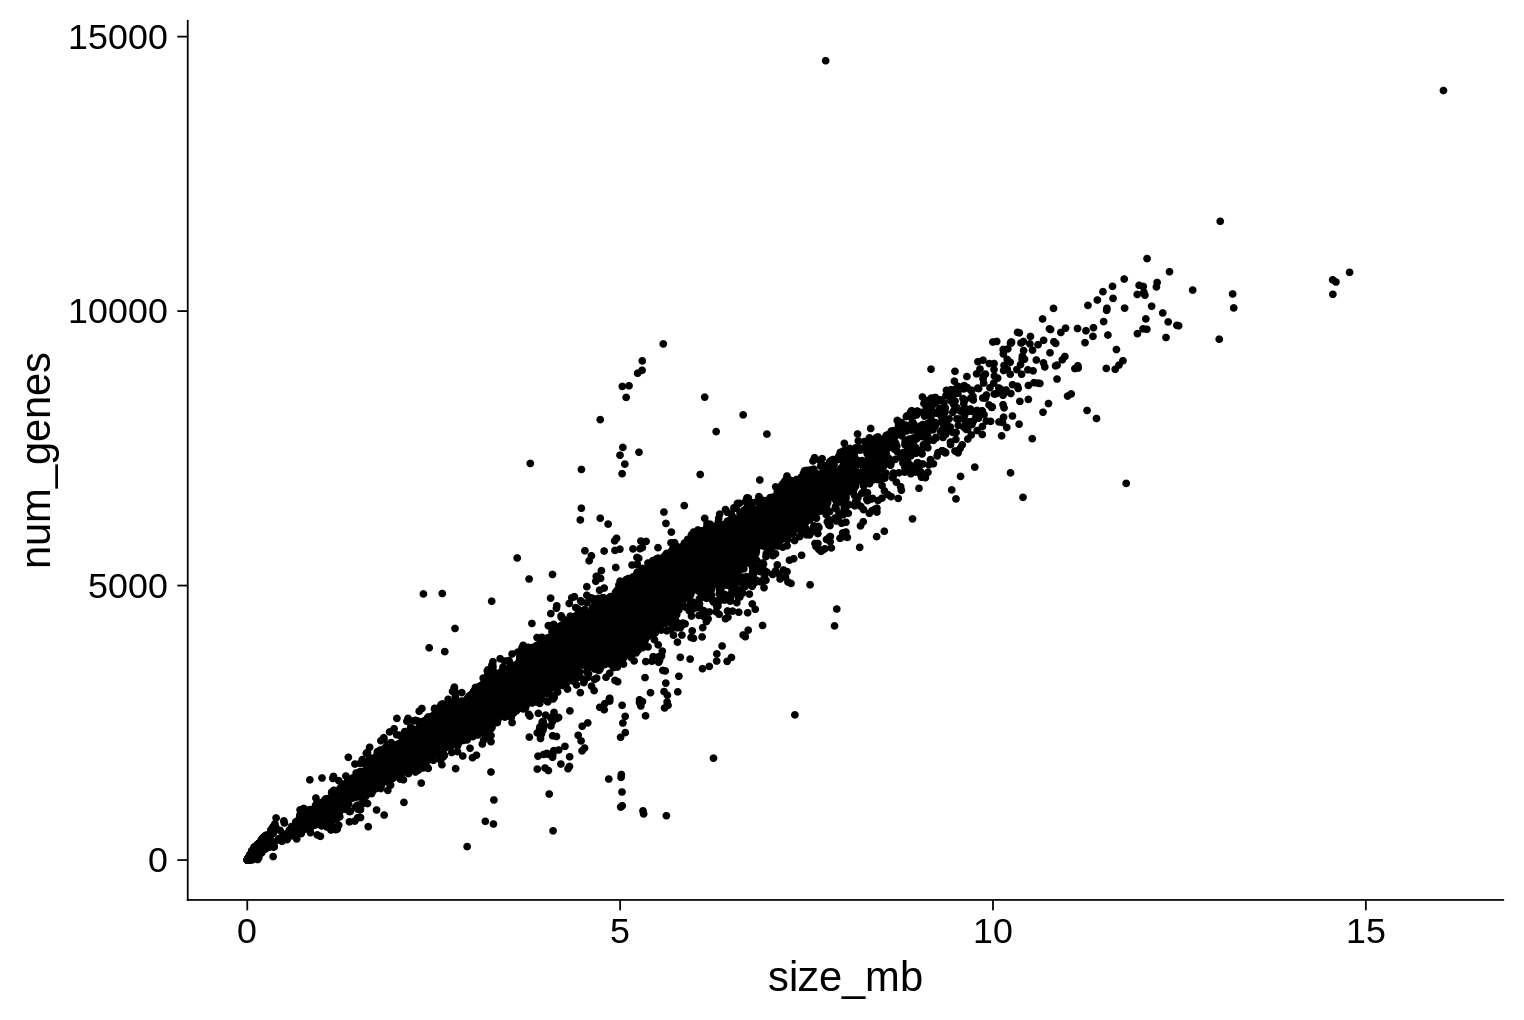

In [44]:
ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point() +
  theme_cowplot(25)

The `25` in the `theme_cowplot(25)` specifies the default font size for the axes. You may need to play around with this to get one that looks right.

You can set the names on the axes using the `scale_x_continuous` and `scale_y_continuous` functions (as both x and y are continuous variables.

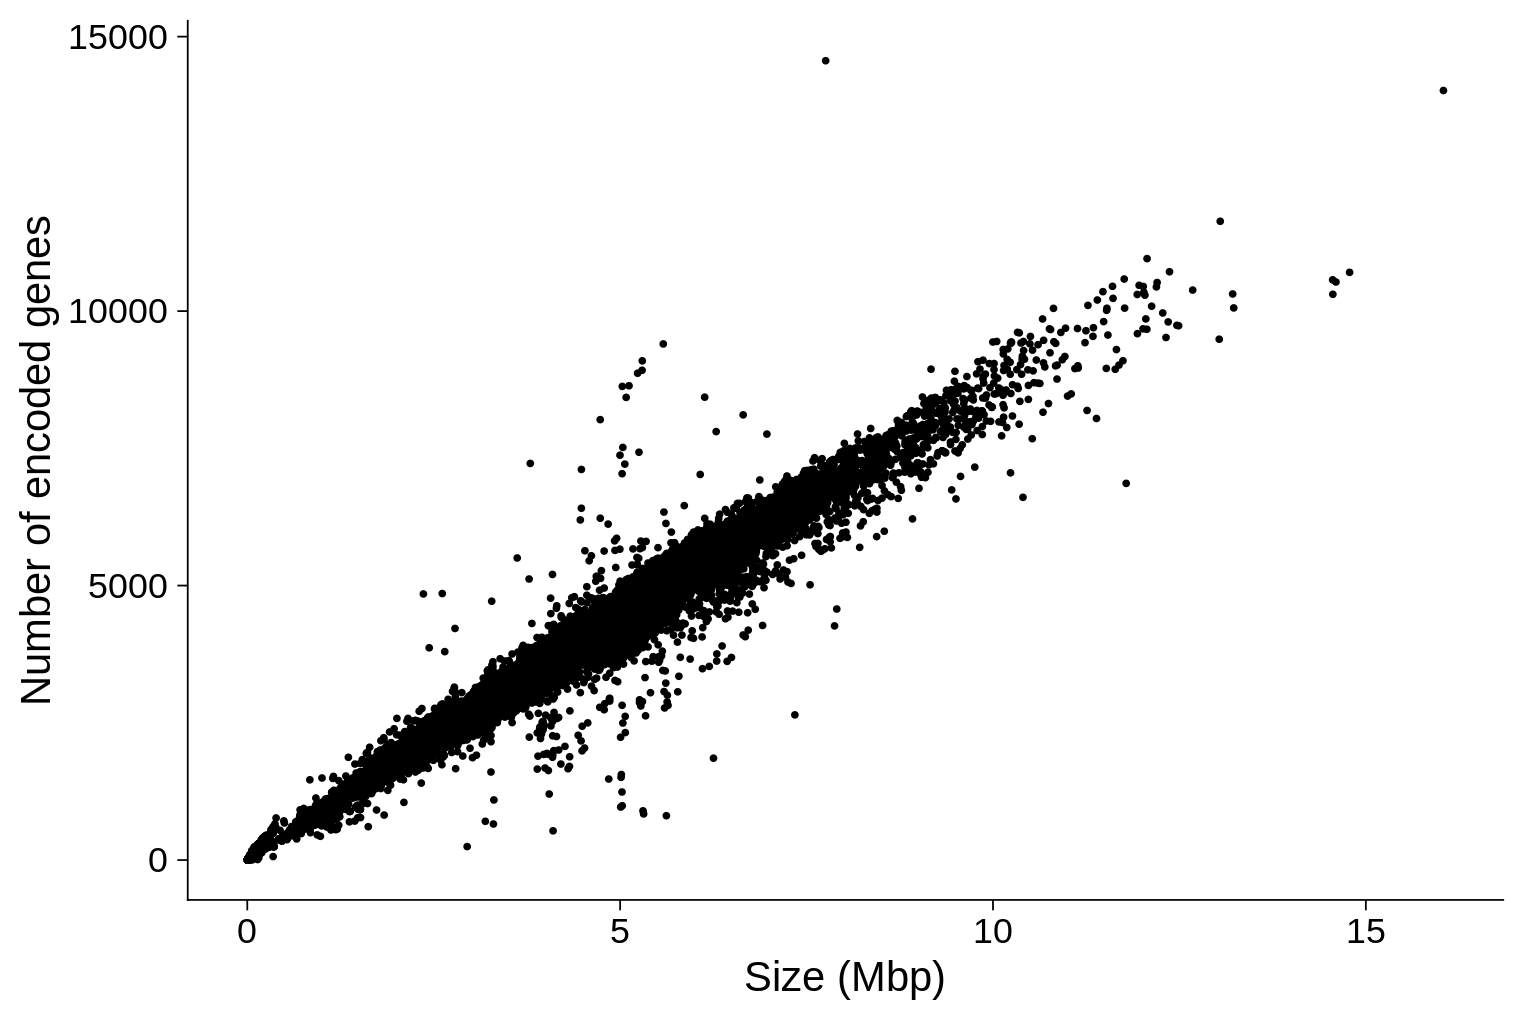

In [46]:
ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point() +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  theme_cowplot(25)

Hypothetically, if it made more sense to plot the y-axis on a log scale (it doesn't in this case, but let's run with it), then you just have to change the type of scale aesthetic you want to apply from `scale_y_continuous` to `scale_y_log10`.


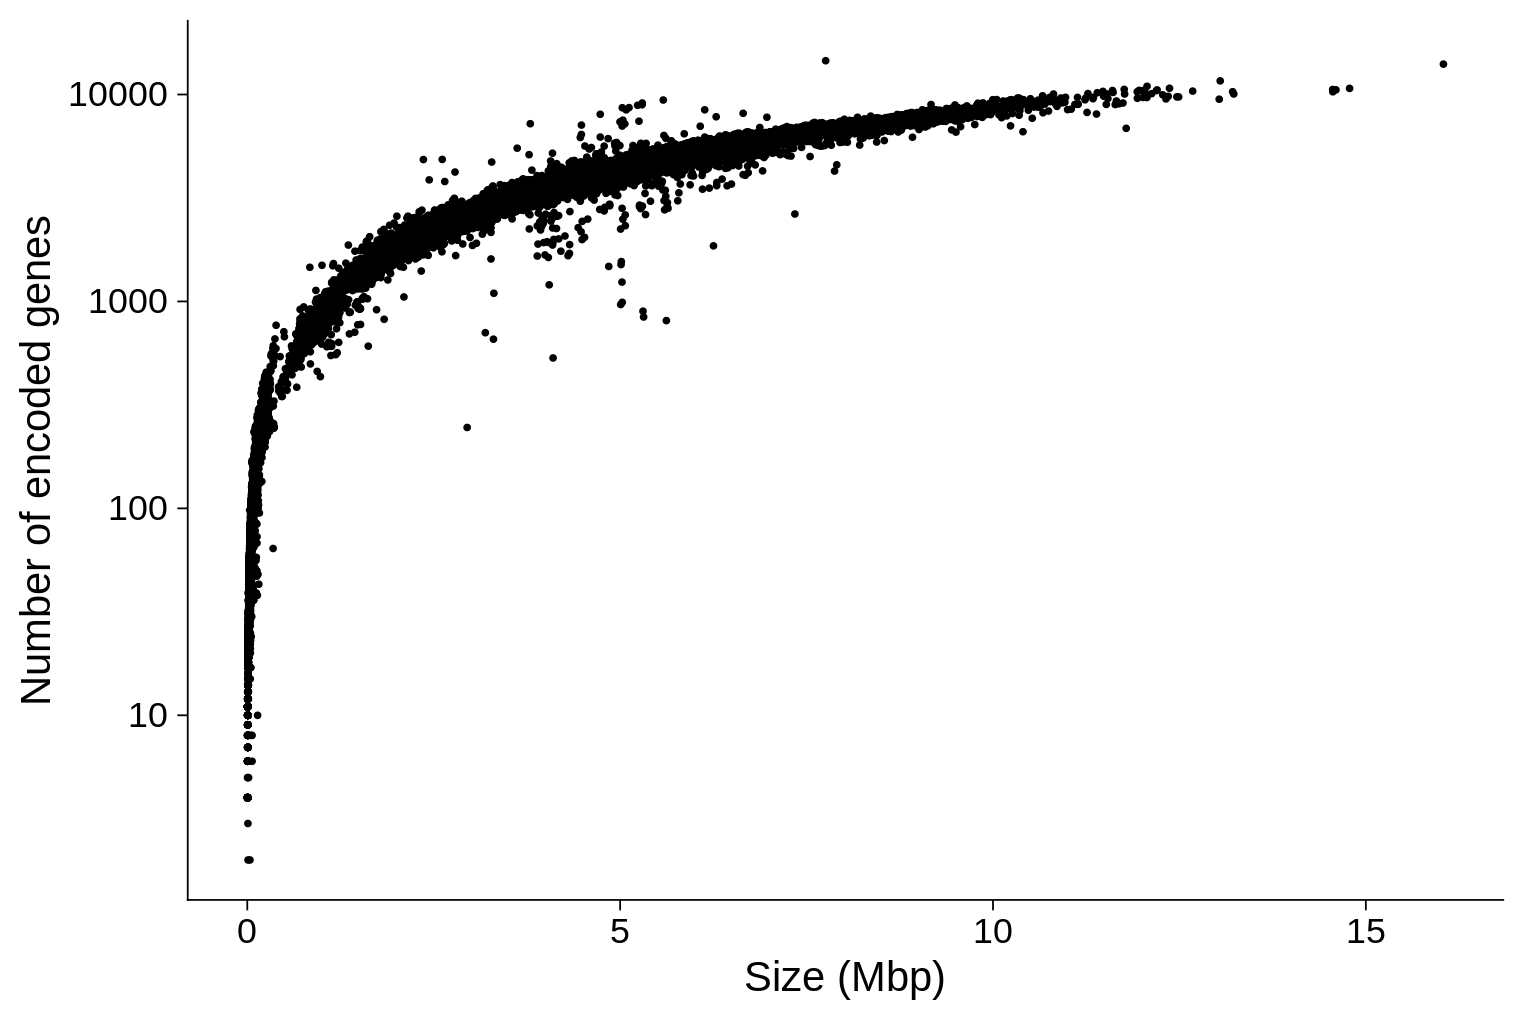

In [47]:
ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point() +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_log10(name='Number of encoded genes') +
  theme_cowplot(25)

What if we want to colour the dots according to their `type`, i.e whether they are from phages or prokaryotes? We can do this by defining the `fill` of the dots in the `geom_point` aesthetic (we'll go back to `scale_y_continuous` at the same time). By default it will pick colours from a standard palette.


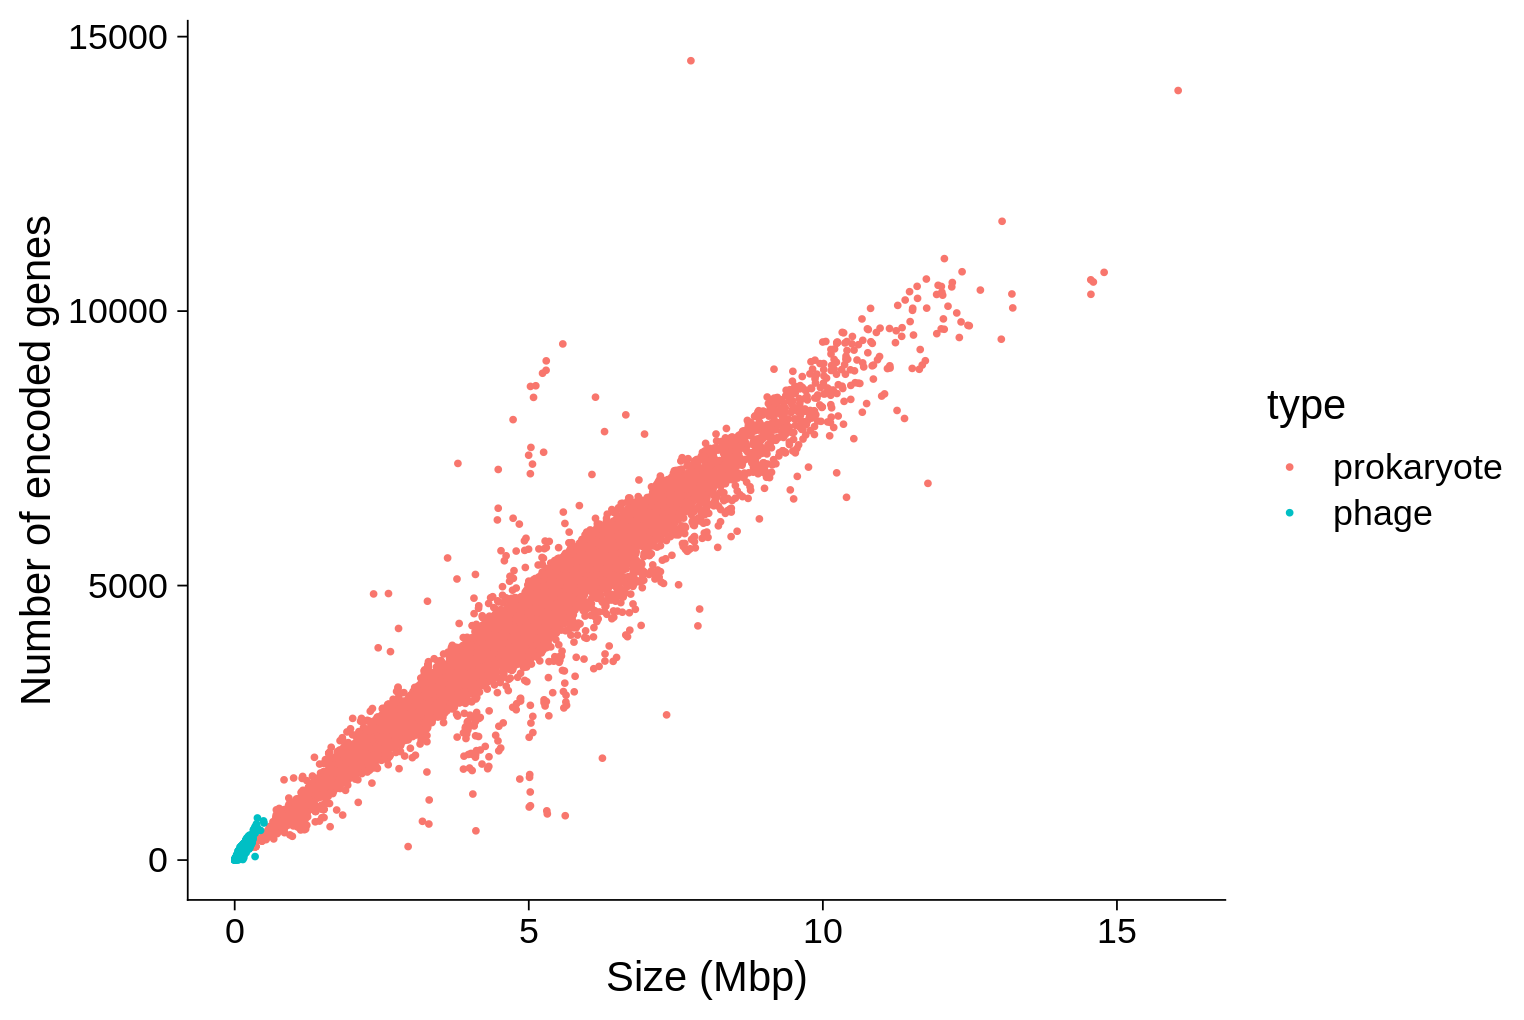

In [12]:
ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point(aes(color = type, fill = type)) +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  theme_cowplot(25)

Note it automatically produces a legend that defines what the colours refer to. An important point here is that we need to specify these things within the `aes` brackets in `geom_point` (e.g `geom_point(aes(color = type, fill = type))`) *because we want it to change the values depending on the data*.

Now, let's see how you would apply a change to all points independently of the underlying data. The biggest problem with this graph at the moment is that the dots are overlaying one another, so you've no idea how many points are in the middle where the distribution is most dense. What we want to do is make the dots more translucent, so we can see when they overlap. We can do this by controlling the `alpha` of the dots (an alpha of `0` is completely clear, an alpha of `1` is completely opaque).

We can also change their size and their shape (smaller dots tend to be better with lots of data). Because we want this to apply to all points, we do it outside of the `aes` of `geom_point`. A full list of shape numbers is [here](https://sape.inf.usi.ch/quick-reference/ggplot2/shape). `21` is a circle where the fill and outline can be controlled separately.

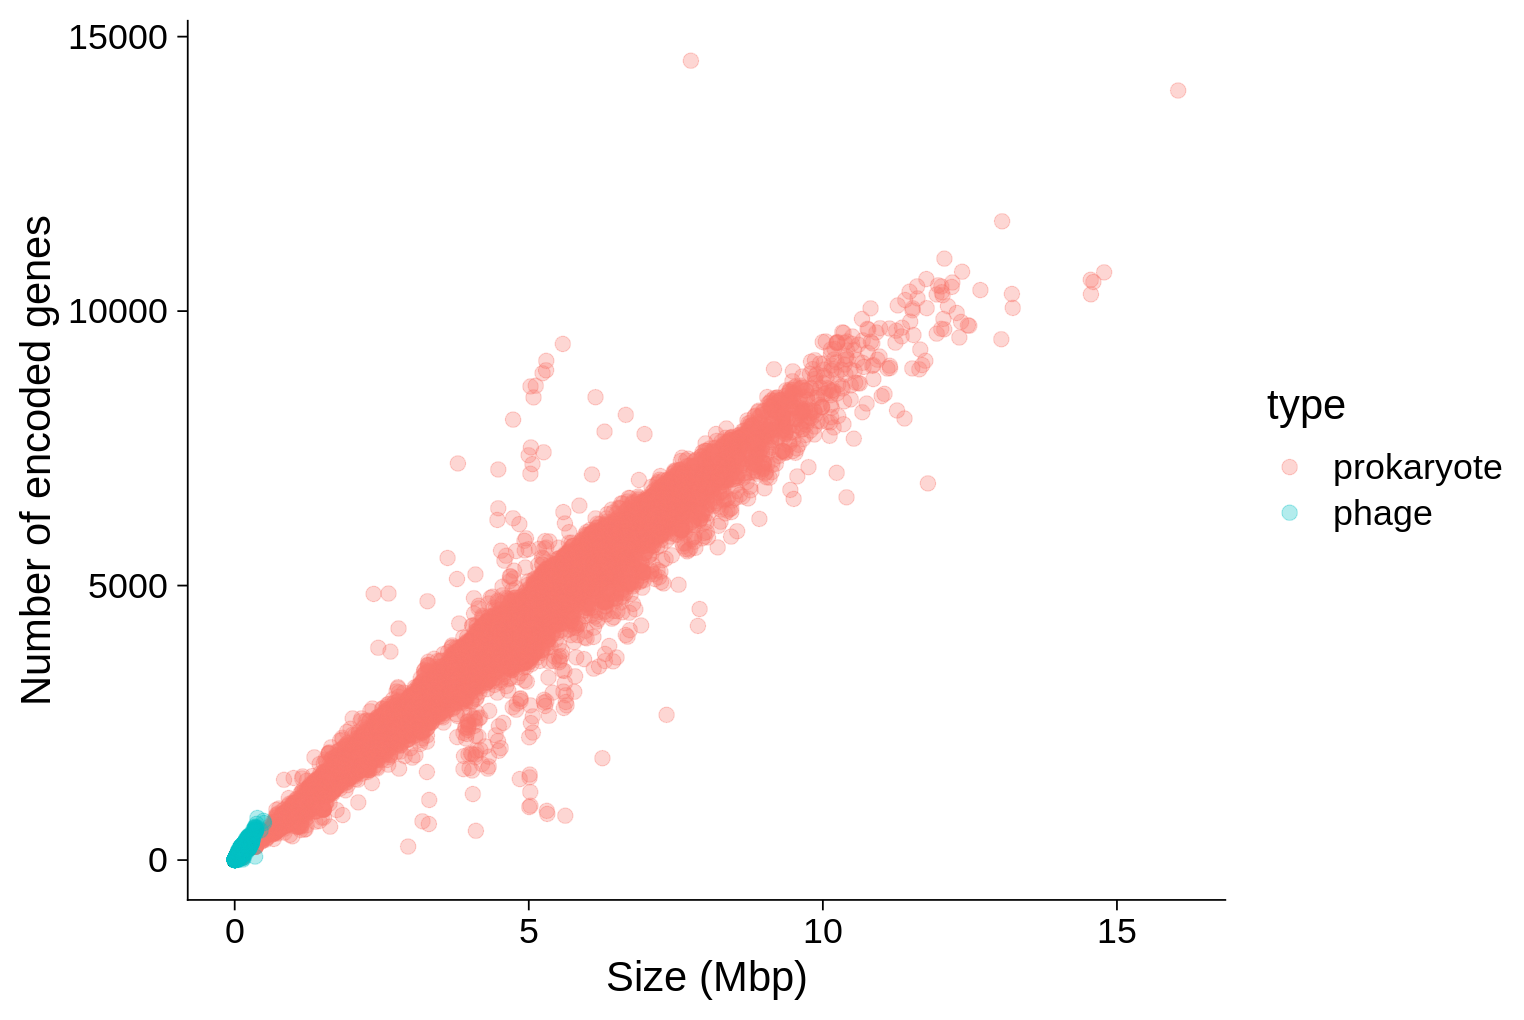

In [13]:
ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point(aes(color = type, fill = type),
             size=4, shape=21, alpha=0.3) +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  theme_cowplot(25)

By default the colours used by `ggplot` are not colorblind-friendly. Lots of research has been done on what colours to use for graphics and a safe-bet is to use the ["Okabe Ito colors"](https://mikemol.github.io/technique/colorblind/2018/02/11/color-safe-palette.html).

We can specify the colours by they ['hex' value](https://www.color-hex.com/), which gives base-16 values for red, green, and blue:


*   White is 'ffffff' - the maximum value of 256 (`ff`) for red, green and blue.
*   Black is '000000' - the minimum value of 0 for red, green and blue.
*   Blue would be '0000ff', green would be'00ff00'
*  Neutral grey would be '888888'


The Okabe Ito colour scheme values are given as a vector of colours:

```
okabe_ito <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#999999")
```

We use `scale_color_manual` to pecify a colour the border of the point, and `scale_fill_manual` to specify a color for the fill of the point.

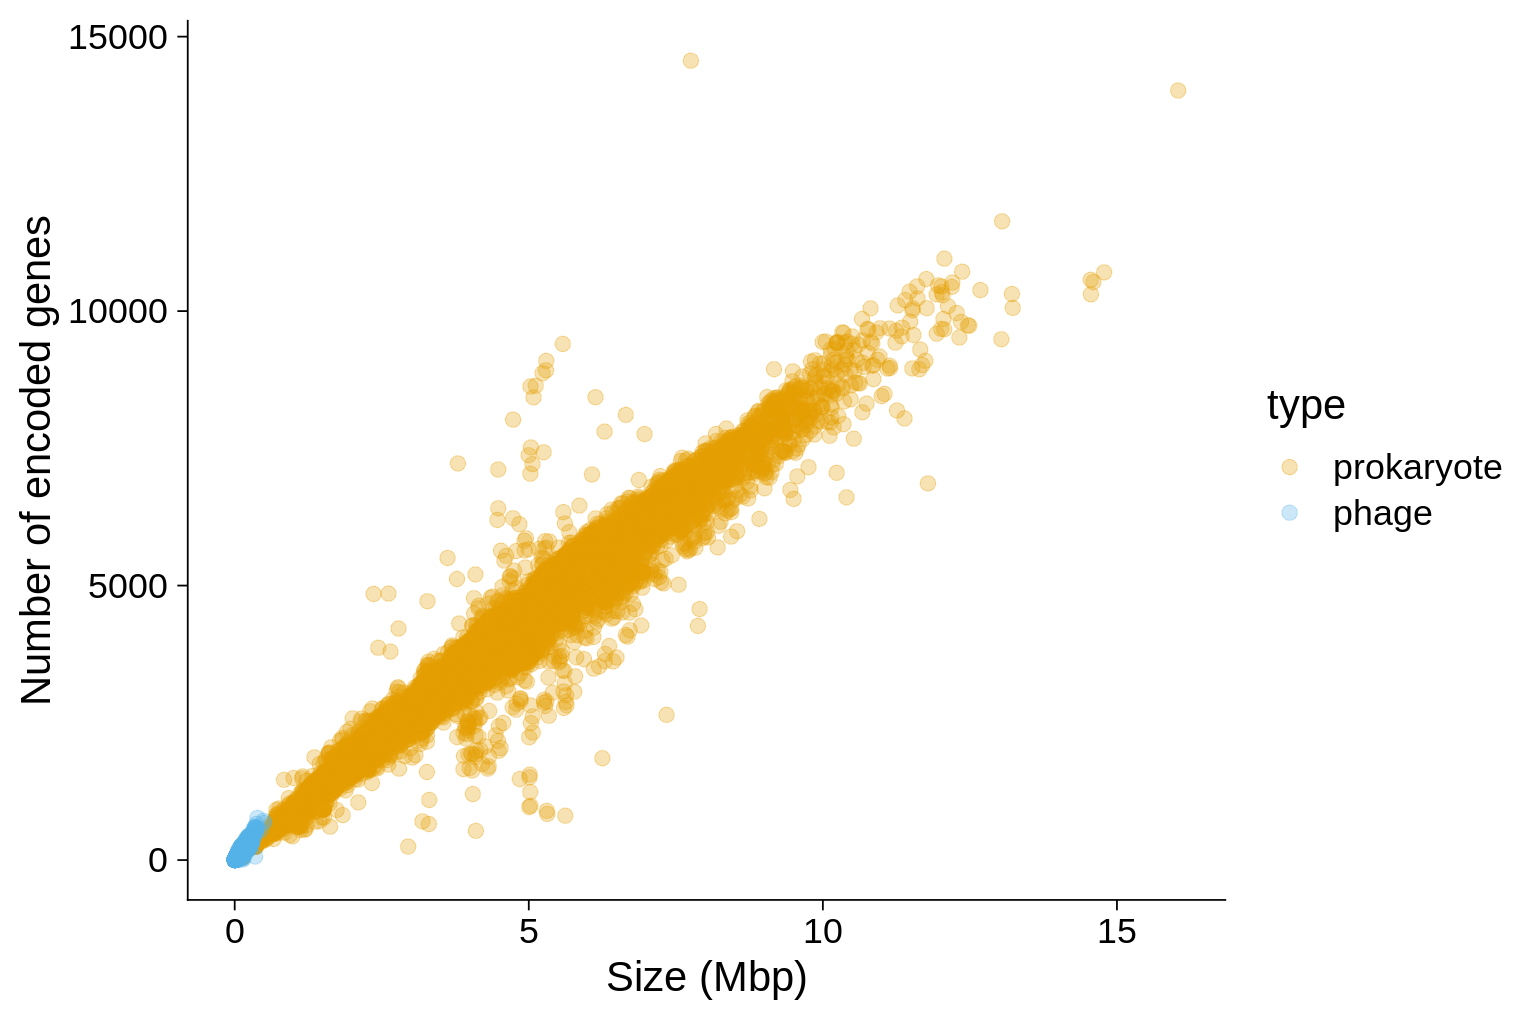

In [14]:
okabe_ito <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#999999")


ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point(aes(color = type, fill = type),
             size=4, shape=21, alpha=0.3) +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  scale_fill_manual(values=okabe_ito) +
  scale_color_manual(values=okabe_ito) +
  theme_cowplot(25)

In this case, we only have two factors, so it'll use the first two colours in the Okabe and Ito palette. If you had more than six factors, it would re-use the first colour for factor #7, the second colour for factor #8 etc. It's generally a bad idea to have plots with more than six colours.

I like to make the outline of the point (the colour) slightly darker than the fill, and we can do this using the `darken` method from the `colorspace` library we installed when we started the notebook. We'll darken it by 30%.

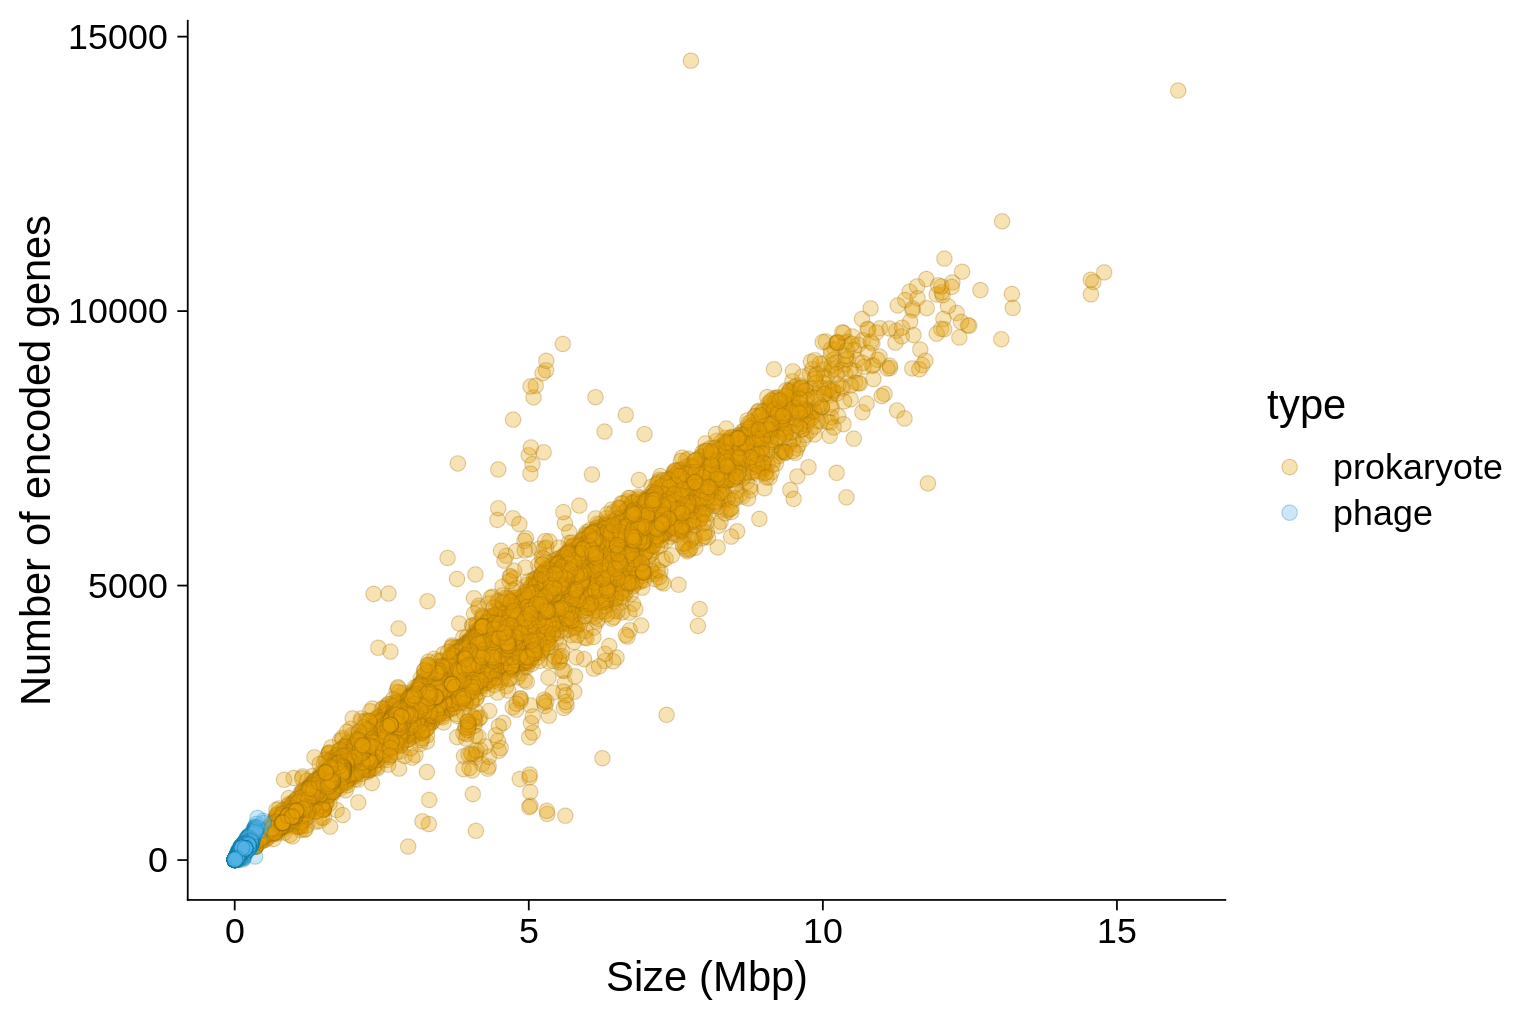

In [15]:
okabe_ito <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#999999")


ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point(aes(color = type, fill = type),
             size=4, shape=21, alpha=0.3) +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  scale_fill_manual(values=okabe_ito) +
  scale_color_manual(values=darken(okabe_ito, 0.3)) +
  theme_cowplot(25)

What if we want to fit a trend line to this data? Well, that's easy - you just include an aesthetic to add a smoothed line of best fit, and we'll specify the model we want to use. Here, we'll use the same model as before, e.g.

```
num_genes ~ size_mb
```

It'll use this by default because they are the variables specified by x and y in the plot. We can also specify the colour and the linetype.

`geom_smooth()` using formula = 'y ~ x'


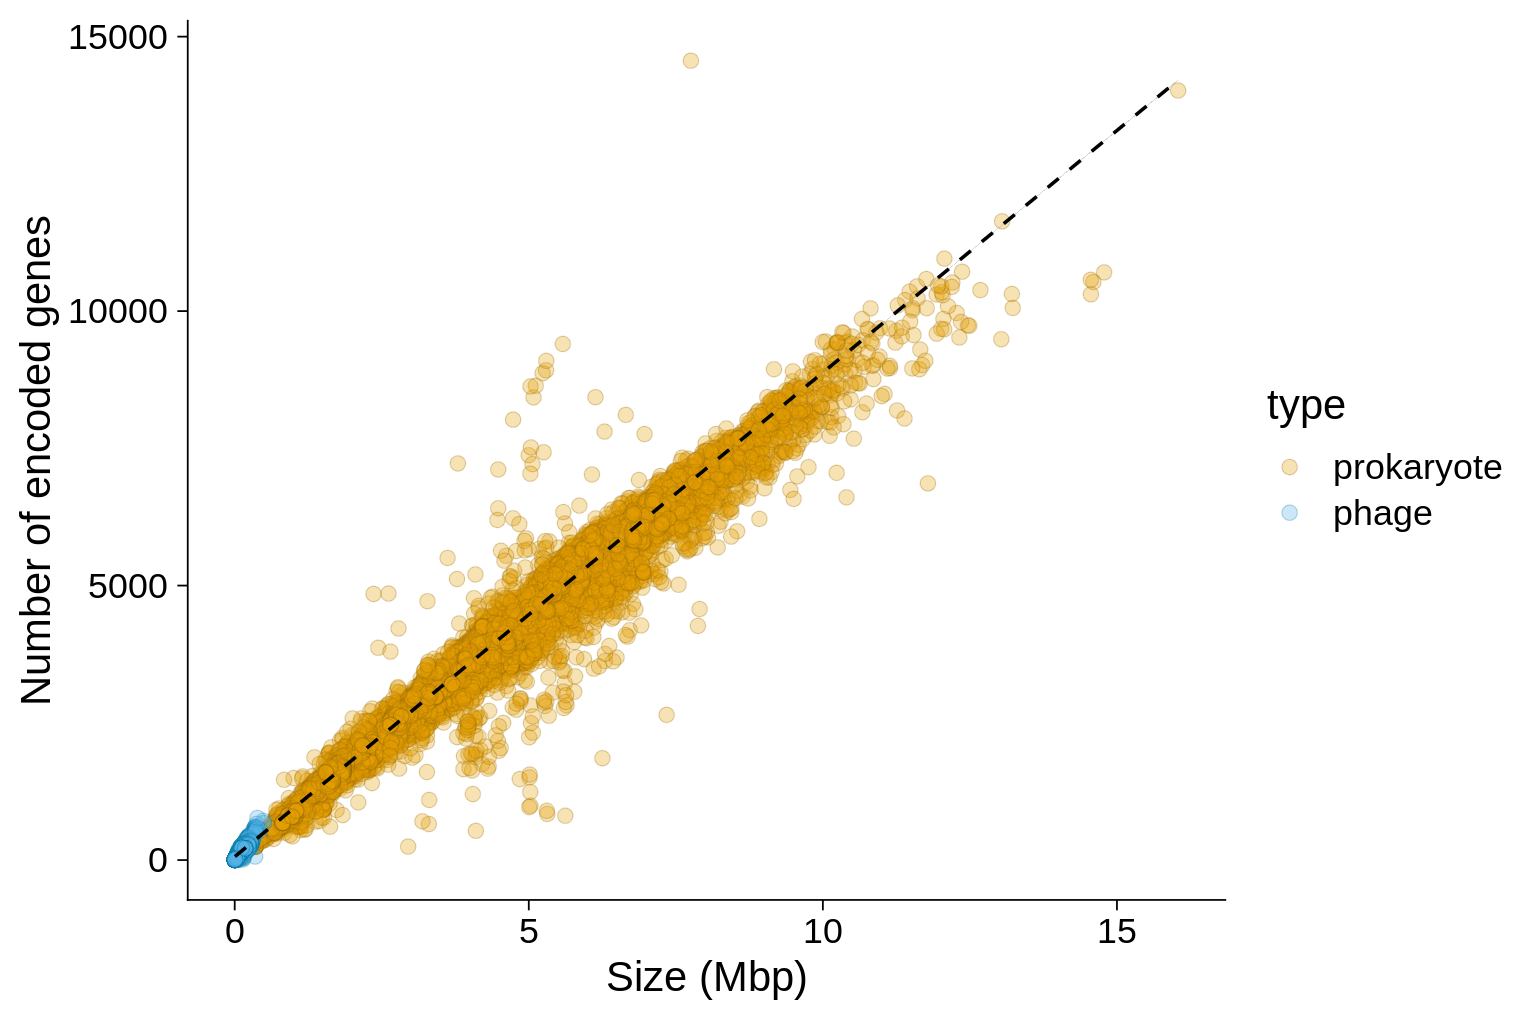

In [16]:
okabe_ito <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#999999")


ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point(aes(color = type, fill = type),
             size=4, shape=21, alpha=0.3) +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  scale_fill_manual(values=okabe_ito) +
  scale_color_manual(values=darken(okabe_ito, 0.3)) +
  geom_smooth(method='lm', colour='black', linetype='dashed') +
  theme_cowplot(25)

One could argue that due to the difference in size of prokaryotes and viruses, it might be better to plot them separately. Here, `ggplot` can be used to do this automatically using a function called `facet_wrap`, which can assign each factor to its own facet. We'll select the `type` variable as the one to separate the data (note the tilde before the name in facet_wrap).

`geom_smooth()` using formula = 'y ~ x'


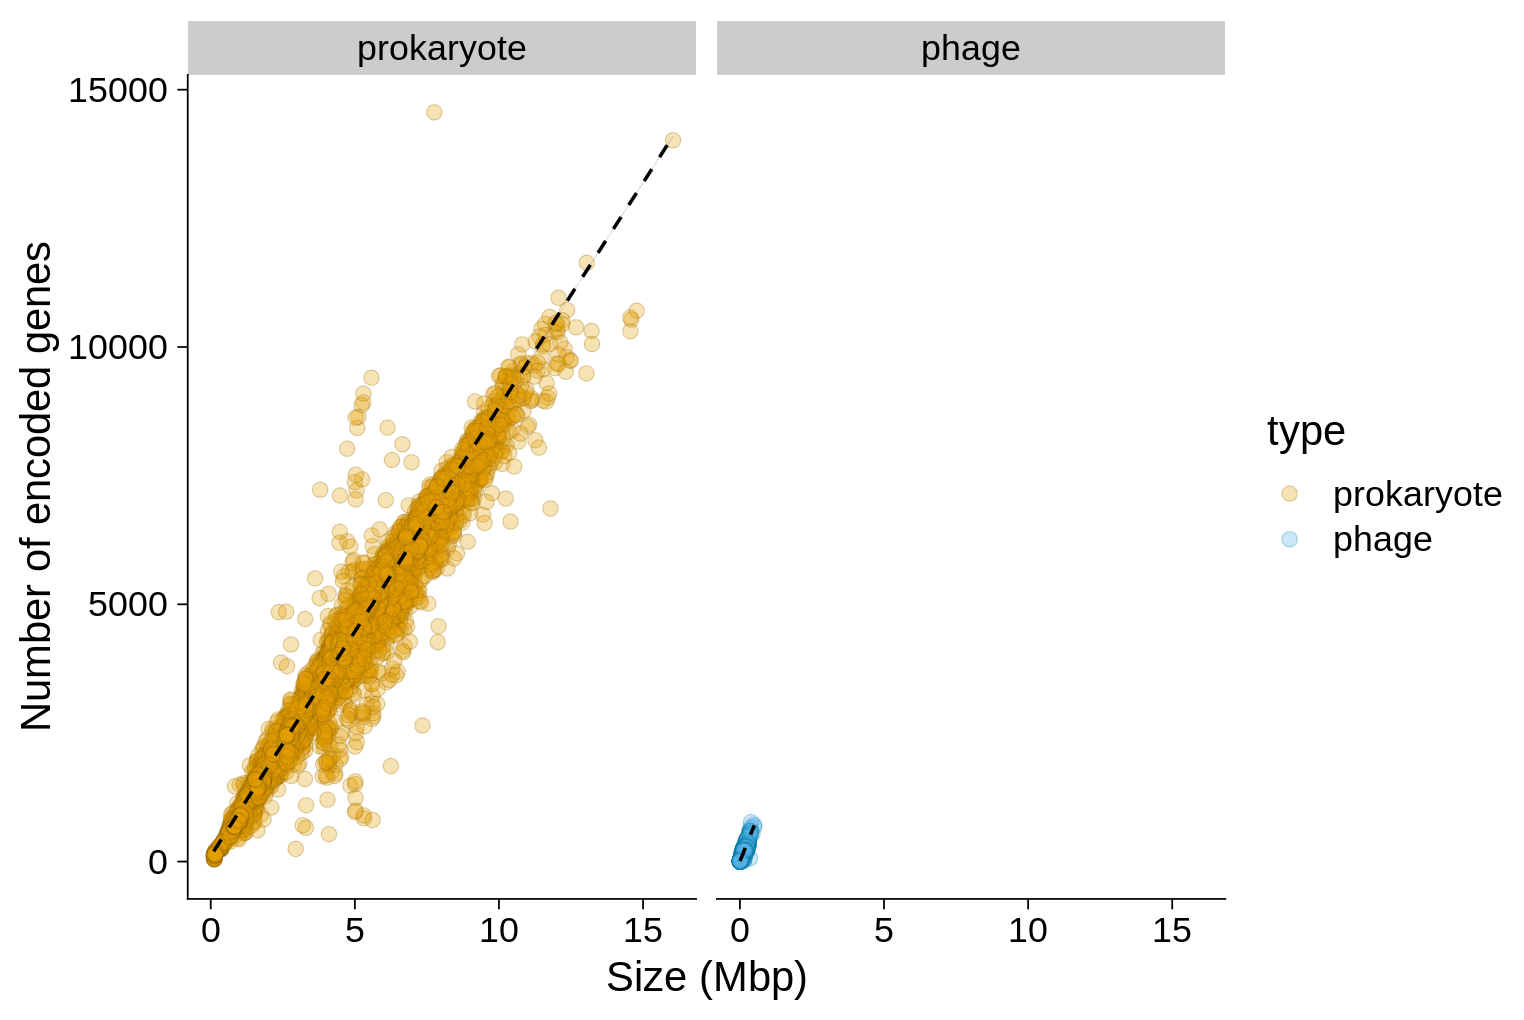

In [17]:
okabe_ito <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#999999")


ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point(aes(color = type, fill = type),
             size=4, shape=21, alpha=0.3) +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  scale_fill_manual(values=okabe_ito) +
  scale_color_manual(values=darken(okabe_ito, 0.3)) +
  geom_smooth(method='lm', colour='black', linetype='dashed') +
  facet_wrap(~type) +
  theme_cowplot(25)

We've separated the data, but it's not very useful because the x and y axes scales are fixed by default. We can release that by specifying the use of free-scaling of x and y axes.

`geom_smooth()` using formula = 'y ~ x'


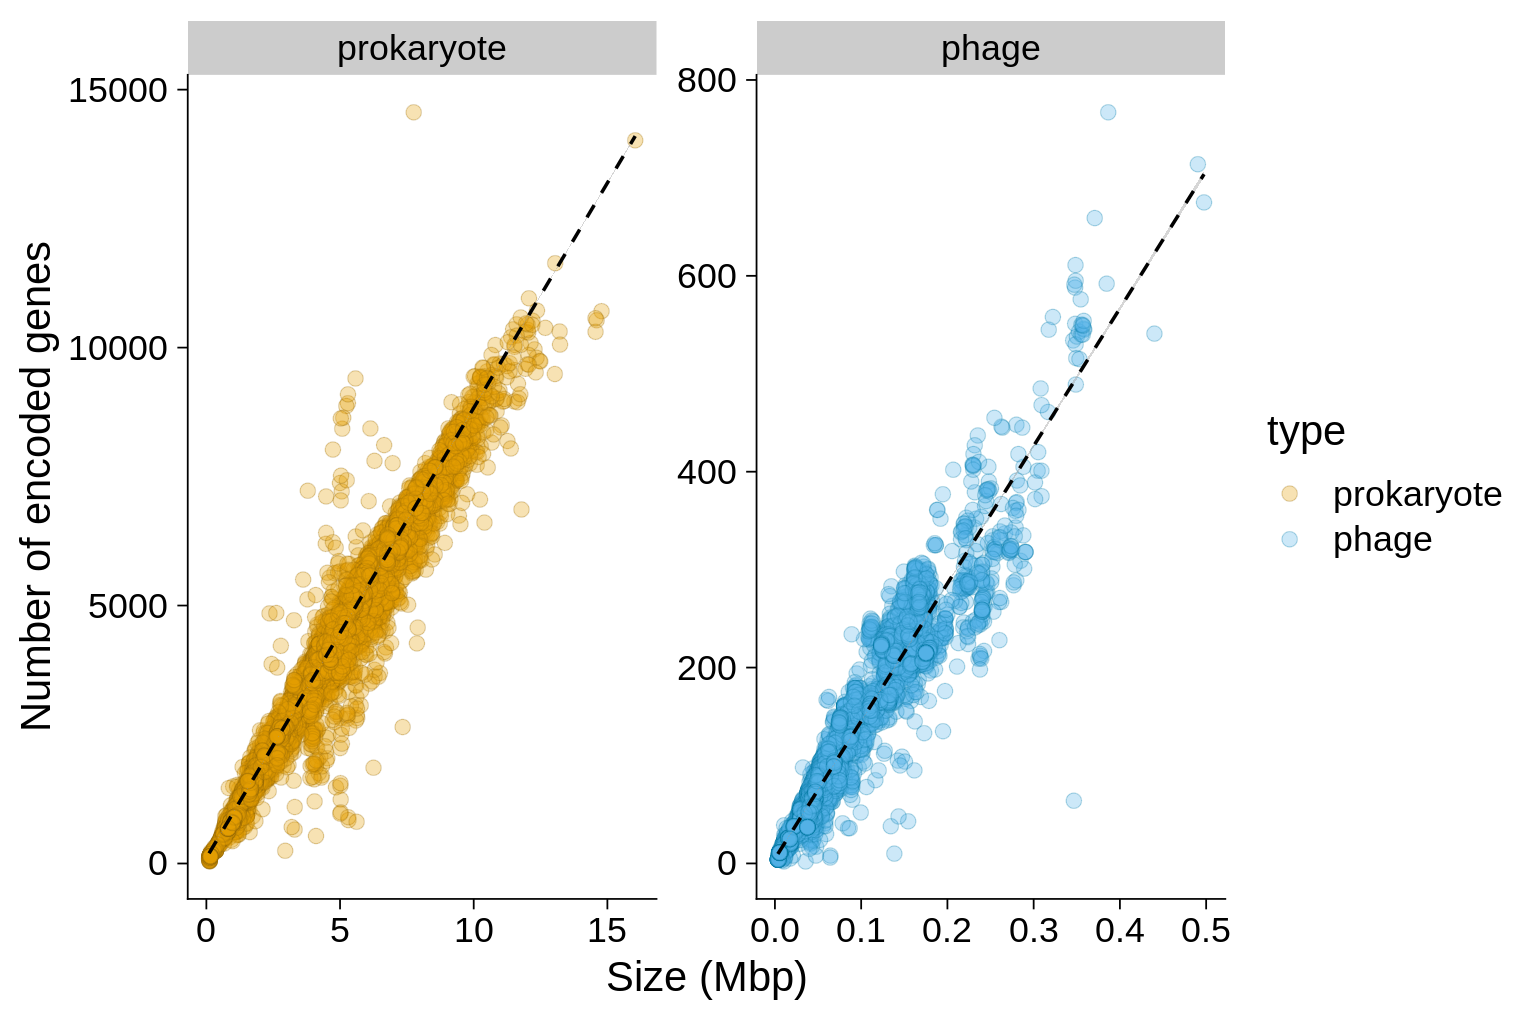

In [18]:
okabe_ito <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#999999")


ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point(aes(color = type, fill = type),
             size=4, shape=21, alpha=0.3) +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  scale_fill_manual(values=okabe_ito) +
  scale_color_manual(values=darken(okabe_ito, 0.3)) +
  geom_smooth(method='lm', colour='black', linetype='dashed') +
  facet_wrap(~type, scales='free') +
  theme_cowplot(25)

Finally, now that we've got them separated, we don't really need the legend anymore, so we can turn it off by applying another theme where the position of the legend is set to 'none' (this is why I keep all my themes at the end). This will free up real-estate on the plot and so make everything a bit bigger

`geom_smooth()` using formula = 'y ~ x'


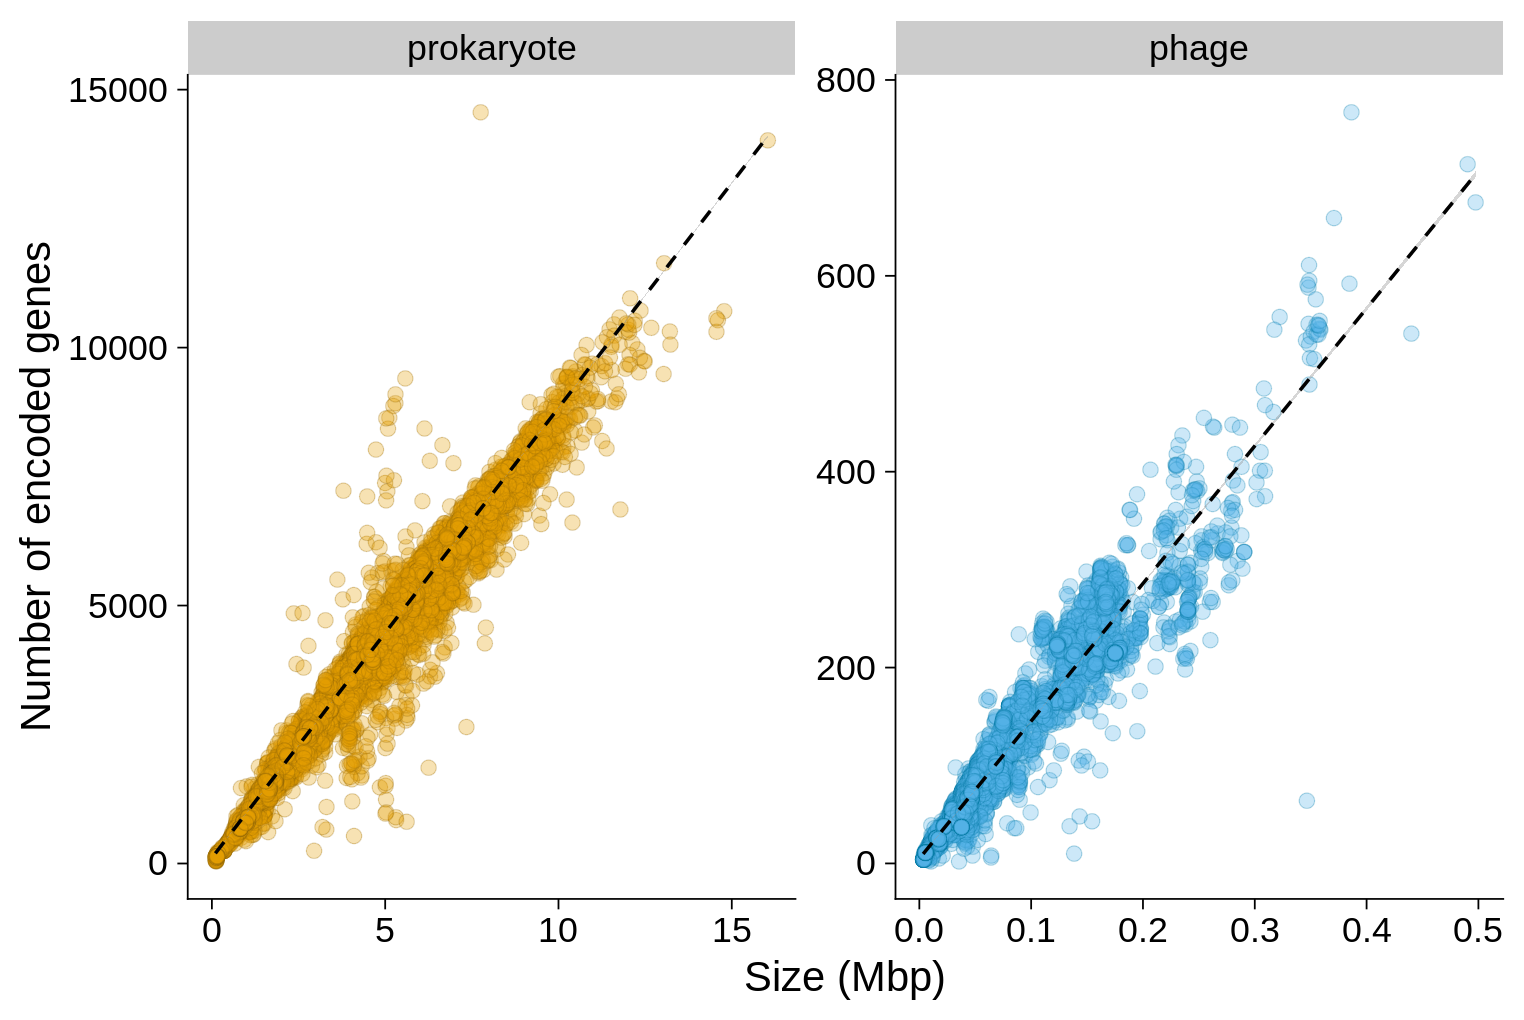

In [19]:
okabe_ito <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#999999")


ggplot(genome_data, aes(x=size_mb, y=num_genes)) +
  geom_point(aes(color = type, fill = type),
             size=4, shape=21, alpha=0.3) +
  scale_x_continuous(name='Size (Mbp)') +
  scale_y_continuous(name='Number of encoded genes') +
  scale_fill_manual(values=okabe_ito) +
  scale_color_manual(values=darken(okabe_ito, 0.3)) +
  geom_smooth(method='lm', colour='black', linetype='dashed') +
  facet_wrap(~type, scales='free') +
  theme_cowplot(25) +
  theme(legend.position = 'none')

It's looking pretty good and we probably want to save it as a figure. We can do this with `ggsave`. We give it a filename and can specify we want it in pdf (vector) or png (scalar, boo) format using the `device` parameter. We also want to set the size of the plot and the units

In [21]:
ggsave('my-cool-plot.pdf', device='pdf', width=12, height=8, units='in')

`geom_smooth()` using formula = 'y ~ x'


The other thing to note here is that `geom_smooth` has been applied to each dataset separately. To work out what the individual coefficients are for each plot, you'll need to remember back to 2nd year stats. We need to include type as a feature in the linear model:

```
num_genes ~ size_mb + type
```

Here the model we are testing is:


\begin{align}
number\ of\ genes = b_0 + b_1 \times genome\ size + b_2[if\ phage] + b_3 \times genome\ size[if\ phage]
\end{align}


And the observed data is:

\begin{align}
number\ of\ genes = b_0 + b_1 \times genome\ size + b_2[if\ phage] + b_3 \times genome\ size[if\ phage] + ERROR
\end{align}

In [27]:
model2 = lm(num_genes ~ size_mb + type, data=genome_data)
summary(model2)


Call:
lm(formula = num_genes ~ size_mb + type, data = genome_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4203.3   -52.0     0.9    97.0  7686.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 108.9324     3.2285   33.74   <2e-16 ***
size_mb     872.3010     0.7116 1225.86   <2e-16 ***
typephage   -69.1804     3.8743  -17.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 236 on 47008 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9871 
F-statistic: 1.793e+06 on 2 and 47008 DF,  p-value: < 2.2e-16


So for phages, on average the number of  genes increases by ~70 fewer per 1Mb of genome than for prokaryotes.

# Exercise 1

See if you can make similar plots to the above to investgate how GC content (e.g. the percentage of the genome that uses G or C). In the genome streamlining lecture, you learned that genome streamlining can result in a shift to low-GC genomes.

You will notice that the line of best fit using `geom_smooth` on these data has a grey region around it. This is the 95% confidence interval that the line fits somewhere in that region. It wasn't visible in the previous graphs because it is so narrow (due to the strong fit).

# Exercise 2

Create and test the appropriate linear model to evaluate whether there is a significant relationship between GC content and genome size for both prokaryotes and phages.

# Exercise 3

`cowplot` allows you to [make figures with multiple parts](https://wilkelab.org/cowplot/articles/plot_grid.html) (e.g. Figure 1A, Figure 1B).

All you need to do is assign each of your plots to a different variable, e.g.

```
plot1 = ggplot(genome_data, aes(x=size_mb, y=num_genes)) + ...

plot2 = (some other plot)
```

Then with cowplot you can combine them and give them a label:

```
plot_grid(plot1, plot2, labels = c('A', 'B'))
```

An example of this using some test data is shown here:

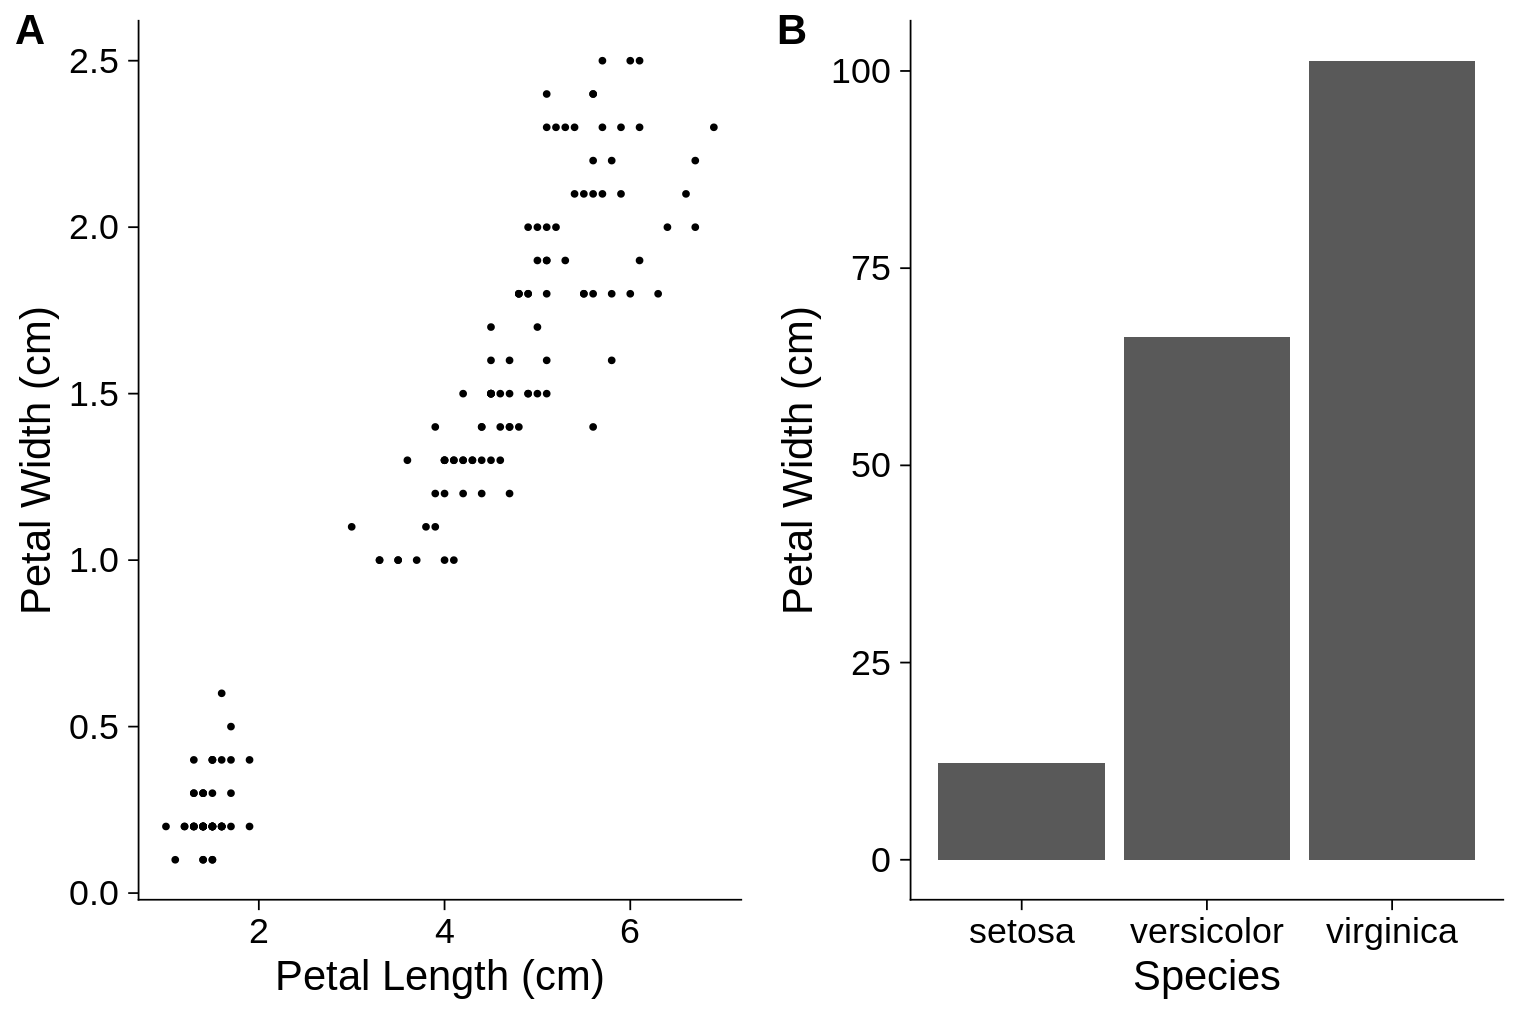

In [32]:
data(iris)

plot1 = ggplot(iris, aes(x=Petal.Length, y=Petal.Width)) +
  geom_point() +
  scale_x_continuous(name='Petal Length (cm)') +
  scale_y_continuous(name='Petal Width (cm)') +
  theme_cowplot(25)

plot2 = ggplot(data=iris,mapping=aes(x=Species,y=Petal.Width))+
  geom_bar(stat="identity") +
  scale_x_discrete(name='Species') +
  scale_y_continuous(name='Petal Width (cm)') +
  theme_cowplot(25)

plot_grid(plot1, plot2, labels = c('A', 'B'), label_size = 25)

See if you can make a plot with A and B subfigures of the plot we made above and your own plot from Exercise 1